# Multi-armed Bandit Problem: 10-armed Testbed

In [33]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
np.random.seed(1234)

### Epsilon-Greedy Bandit Algorithm 

In [34]:
class EpsilonGreedy(object):
    def __init__(self, q_star = None, epsilon=0.01):
    # def __init__(self, q_star = None, arms=10, epsilon=0.01):
        # self.arms = arms
        self.arms = len(q_star)
        # self.q_star = np.random.normal(size=arms)
        self.q_star = q_star
        self.best_arm = np.argmax(self.q_star)
        self.q_t = [0]*self.arms
        self.arm_pulls = [0]*self.arms
        self.epsilon = epsilon
        self.rewards = []
        self.best_arm_pull_flag = []
    
    def update(self, arm, reward):
        self.q_t[arm] = (self.q_t[arm]*self.arm_pulls[arm] + reward) / (self.arm_pulls[arm] + 1)
        self.arm_pulls[arm] += 1
        self.rewards.append(reward)
        if arm == self.best_arm:
            self.best_arm_pull_flag.append(1)
        else:
            self.best_arm_pull_flag.append(0)
    
    def pull(self, arm):
        reward = np.random.normal(loc=self.q_star[arm], scale=1, size=1)[0]
        return reward
    
    def select(self):
        arm = None
        explore_probability = np.random.uniform()
        if explore_probability <= self.epsilon:
            arm = np.random.randint(0, self.arms)
        else:
            arm = np.argmax(self.q_t)
        return arm
    
    def run(self, time_steps=1000):
        for time_step in range(time_steps):
            arm = self.select()
            reward = self.pull(arm)
            self.update(arm, reward)

### Upper Confidence Bound Algorithm

In [35]:
class UCB(object):
    def __init__(self, q_star = None, c=1):
    # def __init__(self, q_star = None, arms=10, epsilon=0.01):
        # self.arms = arms
        self.arms = len(q_star)
        # self.q_star = np.random.normal(size=arms)
        self.q_star = q_star
        self.best_arm = np.argmax(self.q_star)
        self.q_t = [0]*self.arms
        self.arm_pulls = [0]*self.arms
        self.c = c
        self.rewards = []
        self.best_arm_pull_flag = []
        self.ucb = [np.inf]*self.arms
    
    def update(self, arm, reward):
        self.q_t[arm] = (self.q_t[arm]*self.arm_pulls[arm] + reward) / (self.arm_pulls[arm] + 1)
        self.arm_pulls[arm] += 1
        self.ucb[arm] = self.q_t[arm] + self.c * np.sqrt(np.log(sum(self.arm_pulls) + 1) / self.arm_pulls[arm])
        self.rewards.append(reward)
        if arm == self.best_arm:
            self.best_arm_pull_flag.append(1)
        else:
            self.best_arm_pull_flag.append(0)
    
    def pull(self, arm):
        reward = np.random.normal(loc=self.q_star[arm], scale=1, size=1)[0]
        return reward
    
    def select(self):
        arm = np.argmax(self.ucb)
        return arm
    
    def run(self, time_steps=1000):
        for time_step in range(time_steps):
            arm = self.select()
            reward = self.pull(arm)
            self.update(arm, reward)

### Testing Framework

#### 1. Performance of Greedy and Epsilon-Greedy

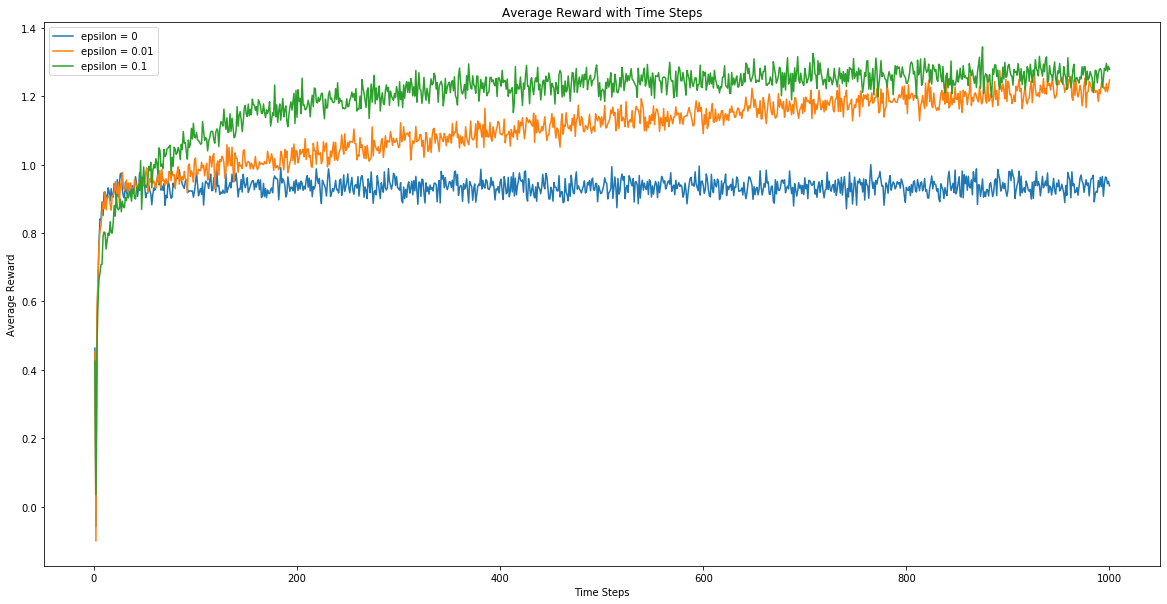

In [36]:
#epsilon greedy
arms = 10
q_star = np.random.normal(size=arms)
epsilon_rewards = []
epsilon_best_arms = []
epsilons = [0, 0.01, 0.1]
for epsilon in epsilons:
    bandit_rewards = []
    bandits_best_arms = []
    for run in range(2000):
        bandit = EpsilonGreedy(q_star, epsilon=epsilon)
        bandit.run(1000)
        bandit_rewards.append(bandit.rewards)
        bandits_best_arms.append(bandit.best_arm_pull_flag)
    mean_rewards = np.mean(bandit_rewards, 0)
    epsilon_rewards.append(mean_rewards)
    prop_best_arm = np.mean(bandits_best_arms, 0)
    epsilon_best_arms.append(prop_best_arm)


for i in range(len(epsilon_rewards)):
    plt.plot(range(1, 1001), epsilon_rewards[i], label='epsilon = {}'.format(epsilons[i]))

plt.legend()
plt.title('Average Reward with Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.show()

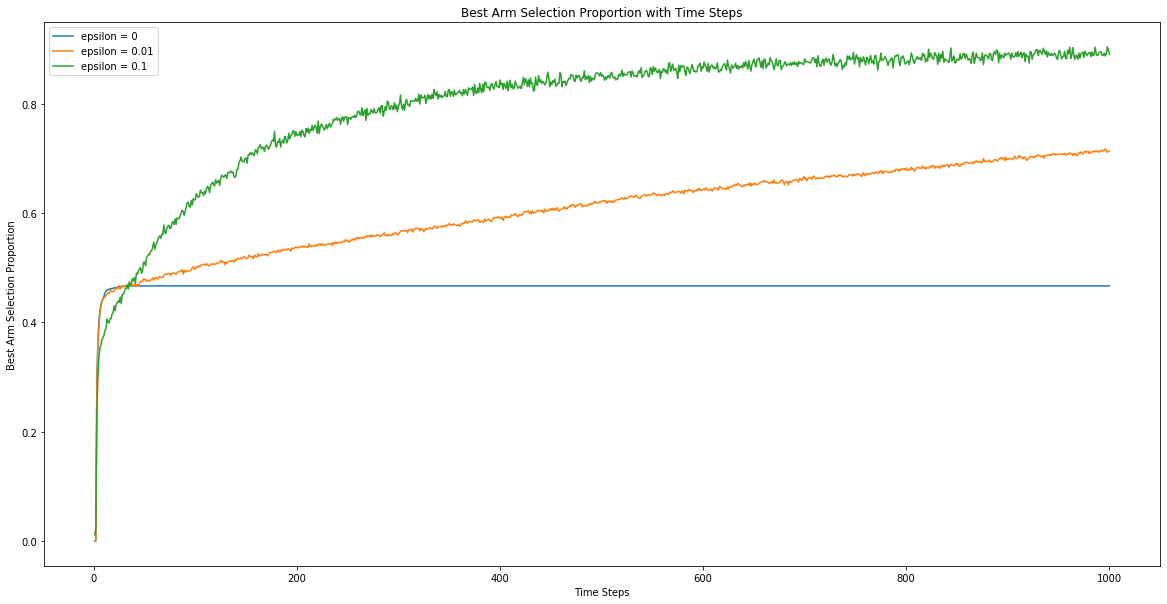

In [37]:
for i in range(len(epsilon_best_arms)):
    plt.plot(range(1, 1001), epsilon_best_arms[i], label='epsilon = {}'.format(epsilons[i]))

plt.legend()
plt.title('Best Arm Selection Proportion with Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Best Arm Selection Proportion')
plt.show()


#### 2. Performance of UCB

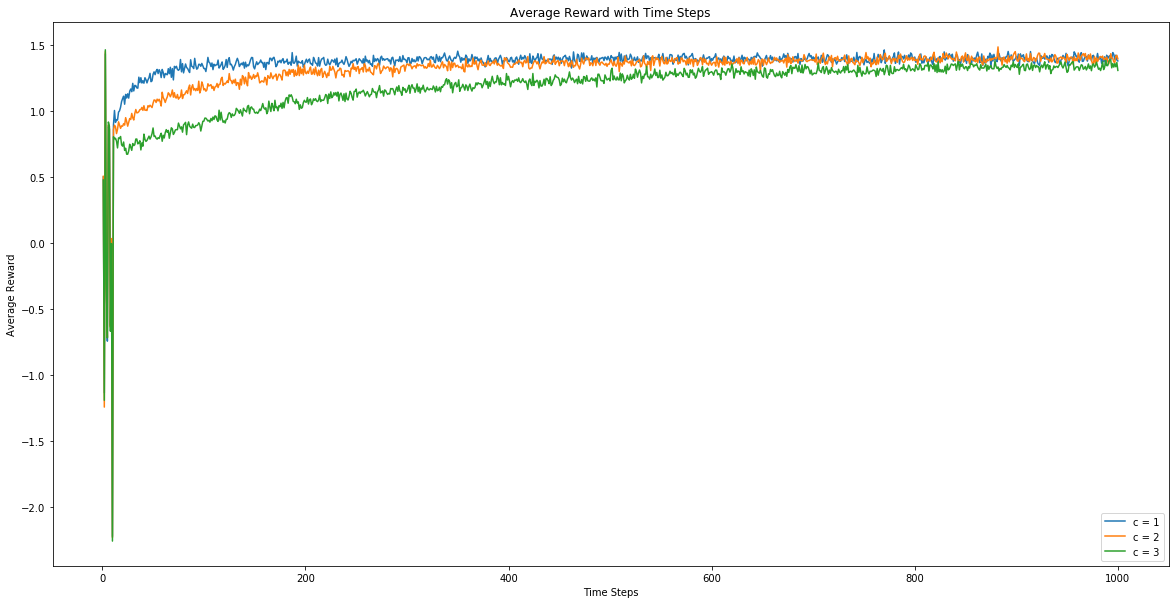

In [38]:
#UCB
# arms = 10
# q_star = np.random.normal(size=arms)
ucb_rewards = []
ucb_best_arms = []
cs = [1, 2, 3]
for c in cs:
    bandit_rewards = []
    bandits_best_arms = []
    for run in range(2000):
        bandit = UCB(q_star, c=c)
        bandit.run(1000)
        bandit_rewards.append(bandit.rewards)
        bandits_best_arms.append(bandit.best_arm_pull_flag)
    mean_rewards = np.mean(bandit_rewards, 0)
    ucb_rewards.append(mean_rewards)
    prop_best_arm = np.mean(bandits_best_arms, 0)
    ucb_best_arms.append(prop_best_arm)


for i in range(len(ucb_rewards)):
    plt.plot(range(1, 1001), ucb_rewards[i], label='c = {}'.format(cs[i]))

plt.legend()
plt.title('Average Reward with Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.show()


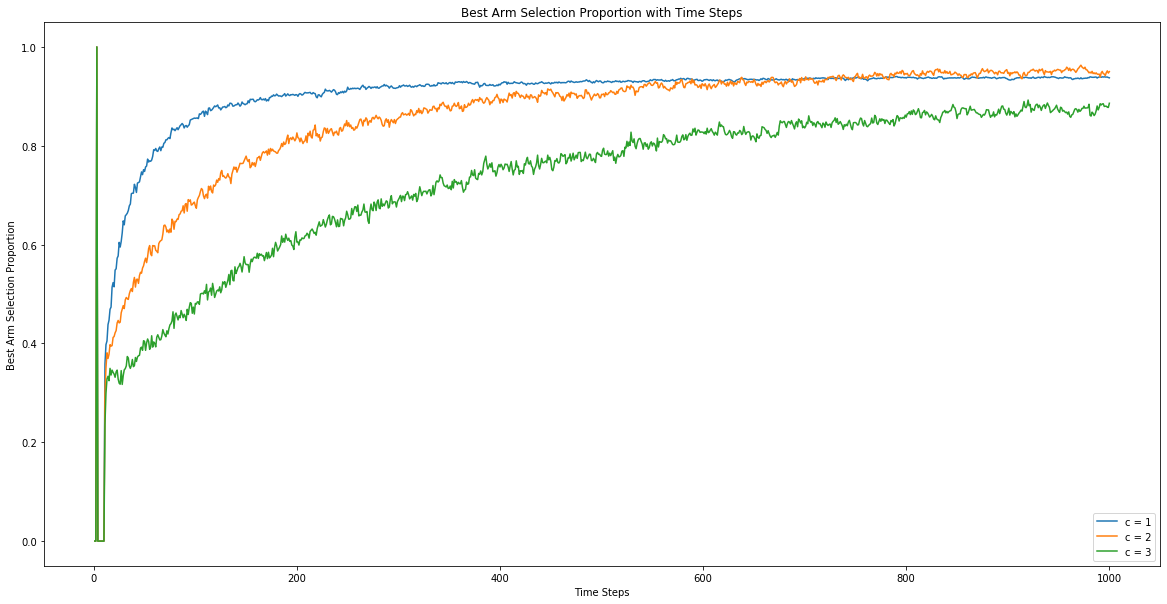

In [39]:
for i in range(len(ucb_best_arms)):
    plt.plot(range(1, 1001), ucb_best_arms[i], label='c = {}'.format(cs[i]))

plt.legend()
plt.title('Best Arm Selection Proportion with Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Best Arm Selection Proportion')
plt.show()


#### 3. Performance Comparison - E-Greedy vs UCB

In [40]:
epsilon_rewards = []
epsilon_best_arms = []
epsilons = [0.10]
for epsilon in epsilons:
    bandit_rewards = []
    bandits_best_arms = []
    for run in range(2000):
        bandit = EpsilonGreedy(q_star, epsilon=epsilon)
        bandit.run(1000)
        bandit_rewards.append(bandit.rewards)
        bandits_best_arms.append(bandit.best_arm_pull_flag)
    mean_rewards = np.mean(bandit_rewards, 0)
    epsilon_rewards.append(mean_rewards)
    prop_best_arm = np.mean(bandits_best_arms, 0)
    epsilon_best_arms.append(prop_best_arm)


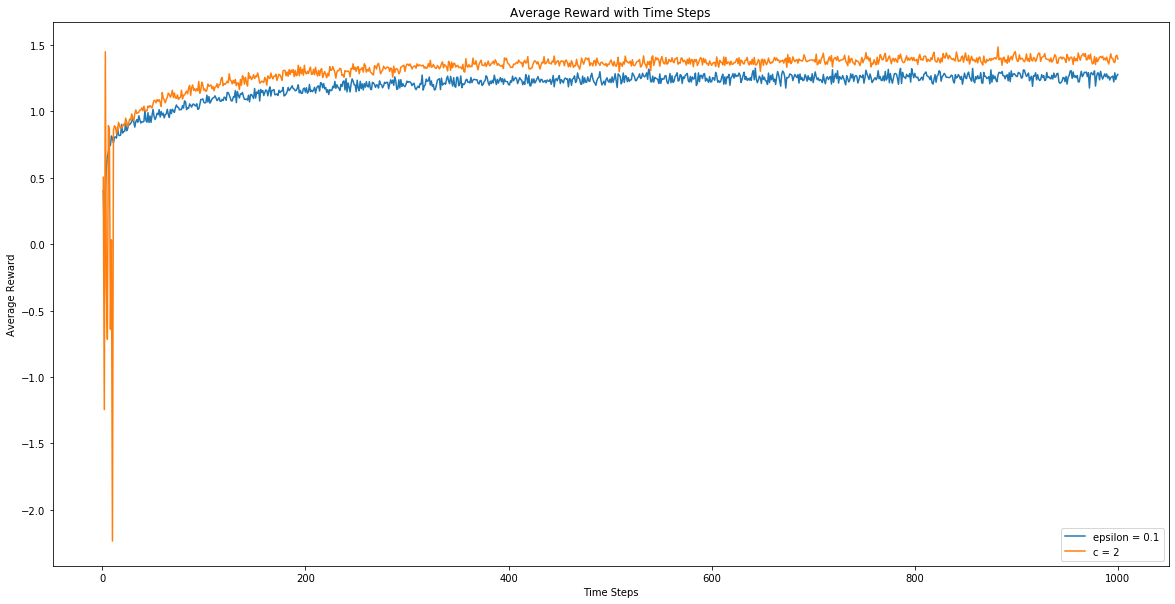

In [41]:
for i in range(len(epsilon_rewards)):
    plt.plot(range(1, 1001), epsilon_rewards[i], label='epsilon = {}'.format(epsilons[i]))

for i in range(1, 2):
    plt.plot(range(1, 1001), ucb_rewards[i], label='c = {}'.format(cs[i]))

plt.legend()
plt.title('Average Reward with Time Steps')
plt.xlabel('Time Steps')
plt.ylabel('Average Reward')
plt.show()